#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузим базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполним загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведем серию экспериментов и добьемся максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируем количество параметров созданной нами нейронной сети.


#Шаблон ноутбука

In [1]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam

# Библиотека для работы с массивами
import numpy as np

# Отрисовка графиков
import matplotlib.pyplot as plt

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from sklearn.datasets import load_wine

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [2]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных
* Категориальное (`one hot encoding`) представление меток
* Разделение данных на три выборки:
  - Обучающую (`x_train, y_train`)
  - Проверочную (`x_val, y_val`)
  - Тестовую (`x_test, y_test`)

In [3]:
# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data,
                                                y_data,
                                                test_size=0.1,
                                                shuffle=True,
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную
x_train, x_val, y_train, y_val = train_test_split(x_all,
                                                  y_all,
                                                  test_size=0.1,
                                                  shuffle=True,
                                                  random_state = 6)
print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(144, 13)
(144,)
Проверочная выборка:
(16, 13)
(16,)
Тестовая выборка:
(18, 13)
(18,)


##Model

Построим нейронную сеть с 3 обычными Dense слоями

In [4]:
model = Sequential()

    # Добавление слоев
model.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

    # Компиляция и возврат модели
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
batch = 8
epoch = 100

In [6]:
history = model.fit(x_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=batch,          # Размер батча (пакета)
          epochs=epoch,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.3863 - loss: 73.7594 - val_accuracy: 0.1724 - val_loss: 78.3605
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3697 - loss: 63.9007 - val_accuracy: 0.1724 - val_loss: 58.4736
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4090 - loss: 44.0703 - val_accuracy: 0.1724 - val_loss: 39.4561
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4027 - loss: 30.8982 - val_accuracy: 0.1724 - val_loss: 19.9945
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4062 - loss: 11.4041 - val_accuracy: 0.4138 - val_loss: 1.1033
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3814 - loss: 1.4295 - val_accuracy: 0.5517 - val_loss: 0.0655
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3583 - loss: 2.5961 - val_accuracy: 0.5517 - val_loss: -0.1152
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3824 - loss: 0.2440 - val_accuracy:

In [7]:
scores_model = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7222 - loss: 5.0463


In [11]:
print('Процент верных ответов на тестовых данных:', round(scores_model[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 72.0 %


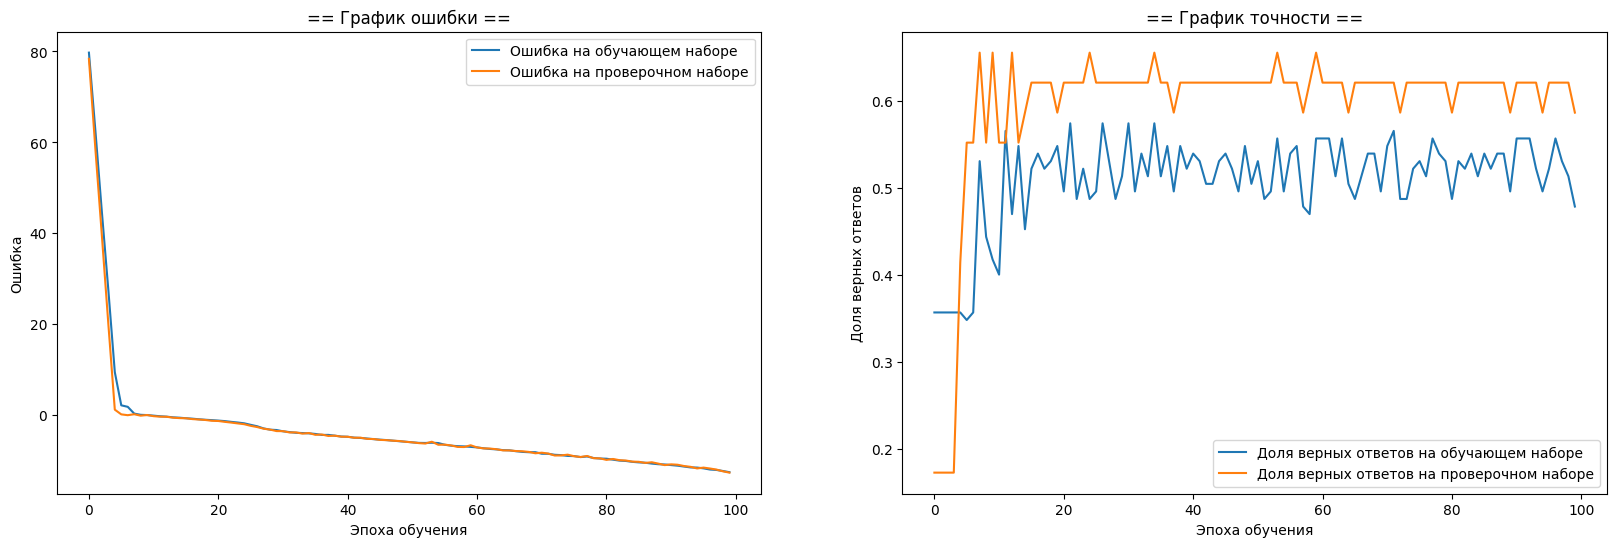

In [12]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(history.history['loss'], label='Ошибка на обучающем наборе')
ax1.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Ошибка')
ax1.legend()
ax1.set_title('== График ошибки ==')

ax2.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
ax2.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Доля верных ответов')
ax2.legend()
ax2.set_title('== График точности ==')

plt.show()

###Вывод model

Model показала результат в 72%, что уже не плохо

##Model_2

Добавим к обычным слоям метод Dropout

In [13]:
model_2 = Sequential()

    # Добавление слоев
model_2.add(Dropout(0.3, input_shape=(x_train.shape[1],)))
model_2.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(30, activation='relu'))
model_2.add(Dropout(0.3))
model_2.add(Dense(1, activation='sigmoid'))

    # Компиляция и возврат модели
model_2.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
batch = 8
epoch = 100

In [15]:
history = model_2.fit(x_train,     # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=batch,          # Размер батча (пакета)
          epochs=epoch,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

scores = model_2.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.3976 - loss: 42.7065 - val_accuracy: 0.5517 - val_loss: 2.3207
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3657 - loss: 10.3968 - val_accuracy: 0.5517 - val_loss: 2.2247
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3936 - loss: 45.6778 - val_accuracy: 0.5517 - val_loss: 2.0325
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4380 - loss: 22.8009 - val_accuracy: 0.5517 - val_loss: 1.8721
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3244 - loss: 34.9473 - val_accuracy: 0.5517 - val_loss: 1.8165
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4430 - loss: 29.0429 - val_accuracy: 0.5517 - val_loss: 1.7724
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3143 - loss: 17.1198 - val_accuracy: 0.5517 - val_loss: 1.6303
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2801 - loss: 35.8022 - val_accuracy: 

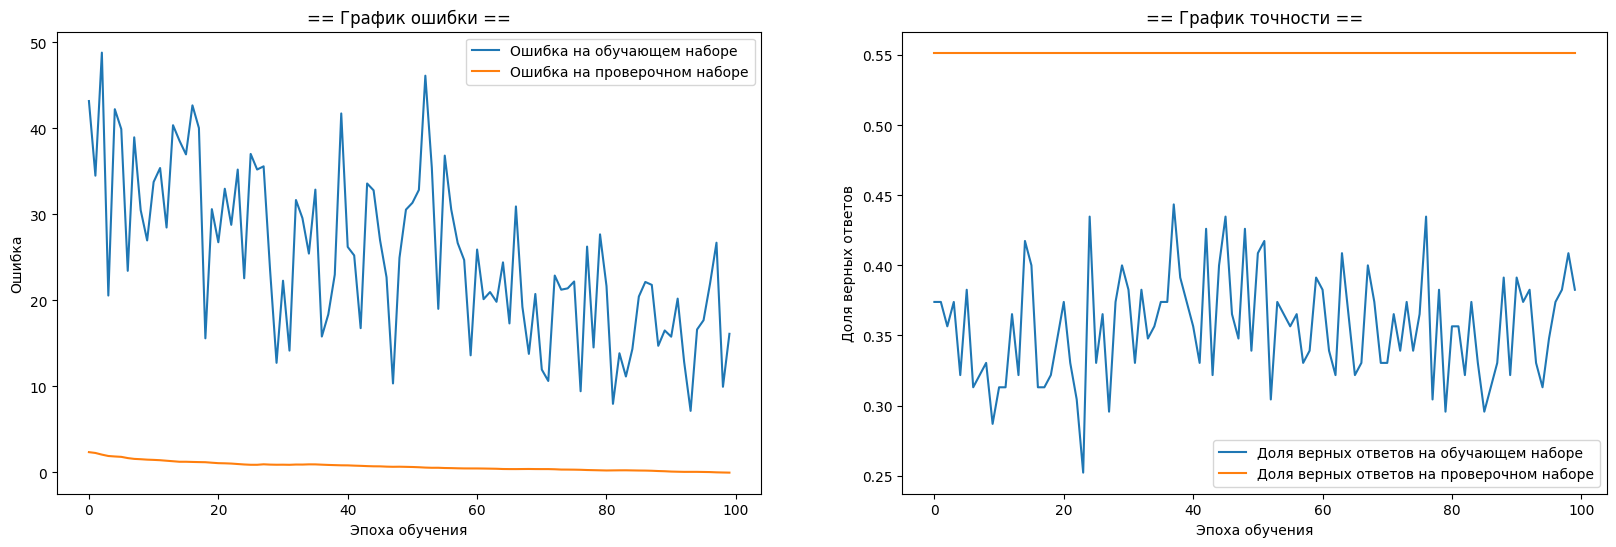

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(history.history['loss'], label='Ошибка на обучающем наборе')
ax1.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Ошибка')
ax1.legend()
ax1.set_title('== График ошибки ==')

ax2.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
ax2.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Доля верных ответов')
ax2.legend()
ax2.set_title('== График точности ==')

plt.show()

###Вывод Model_2

Dropout не улучшил результат. Результат 44% верных ответов на тестовых данных.

##Model_3

Добавим к обычным слоям слои нормализации

In [17]:
model_3 = Sequential()

model_3.add(BatchNormalization(input_shape=(x_train.shape[1], )))
model_3.add(Dense(60, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(30, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model_3.fit(x_train,
                    y_train,
                    batch_size=batch,
                    epochs=epoch,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4582 - loss: 0.7165 - val_accuracy: 0.1724 - val_loss: 3.0967
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4831 - loss: 0.4388 - val_accuracy: 0.2069 - val_loss: 2.3960
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4476 - loss: 0.6208 - val_accuracy: 0.2414 - val_loss: 2.0258
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5239 - loss: 0.4374 - val_accuracy: 0.2414 - val_loss: 1.7587
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4614 - loss: 0.4298 - val_accuracy: 0.2414 - val_loss: 1.5516
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5086 - loss: 0.3640 - val_accuracy: 0.2414 - val_loss: 1.3883
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5532 - loss: 0.1891 - val_accuracy: 0.3448 - val_loss: 1.2138
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5688 - loss: 0.2926 - val_accuracy: 0.3448 - val_loss: 1

In [18]:
scores = model_3.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.9444 - loss: -5.8377
Процент верных ответов на тестовых данных: 94.0 %


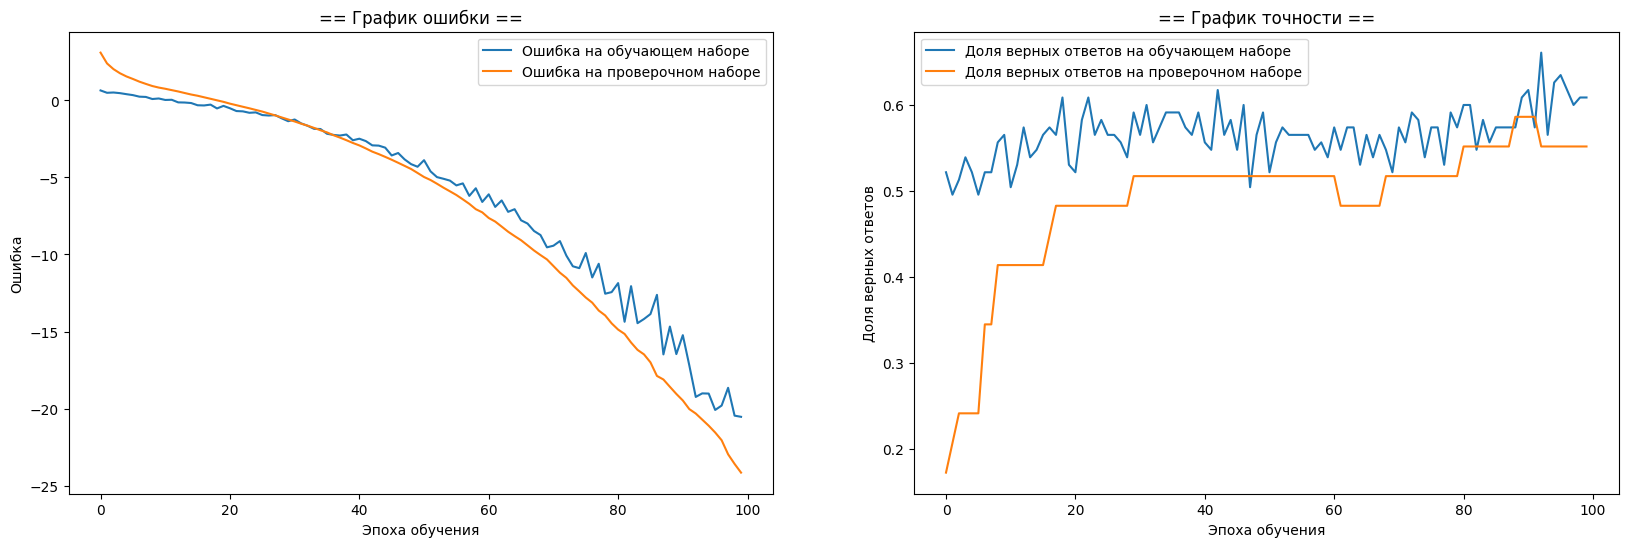

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

ax1.plot(history.history['loss'], label='Ошибка на обучающем наборе')
ax1.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Ошибка')
ax1.legend()
ax1.set_title('== График ошибки ==')

ax2.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
ax2.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Доля верных ответов')
ax2.legend()
ax2.set_title('== График точности ==')

plt.show()

###Вывод Model_3

Применив слои нормализации мы добились необходимого результата. Доля верных ответов 94%

##Model_4

В качестве эксперимента попробуем применить вместе слои Dropout и слои нормализации

Epoch 1/100
15/15 [==============================] - 2s 19ms/step - loss: 1.4076 - accuracy: 0.3043 - val_loss: 0.2736 - val_accuracy: 0.5517
Epoch 2/100
15/15 [==============================] - 0s 8ms/step - loss: 1.2222 - accuracy: 0.3217 - val_loss: 0.3614 - val_accuracy: 0.5517
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 1.2145 - accuracy: 0.3130 - val_loss: 0.4453 - val_accuracy: 0.5517
Epoch 4/100
15/15 [==============================] - 0s 9ms/step - loss: 1.0768 - accuracy: 0.4261 - val_loss: 0.5188 - val_accuracy: 0.5172
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8627 - accuracy: 0.3565 - val_loss: 0.5704 - val_accuracy: 0.5517
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8516 - accuracy: 0.3826 - val_loss: 0.6161 - val_accuracy: 0.4483
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8005 - accuracy: 0.4435 - val_loss: 0.7158 - val_accuracy: 0.3448
Epoch 8/100


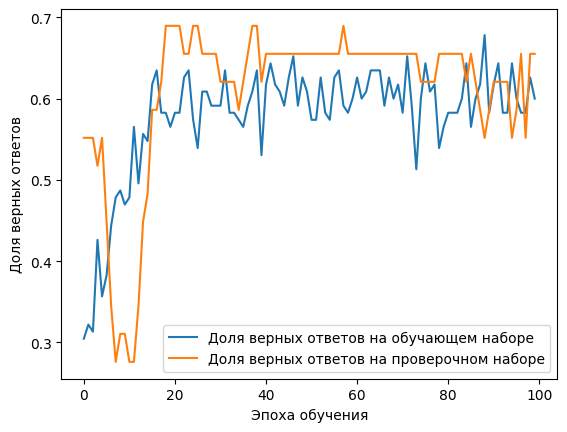

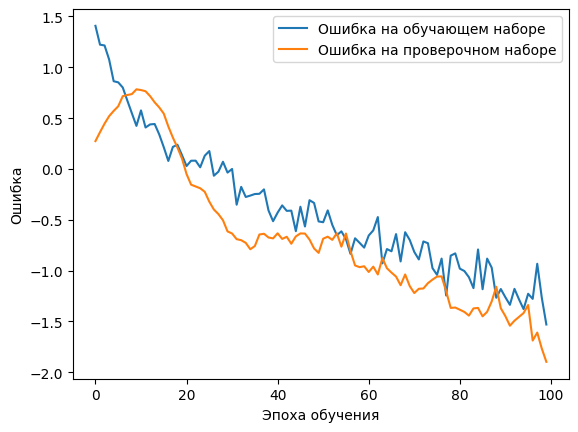

In [ ]:
model_4 = Sequential()

model_4.add(Dense(60, activation='relu', input_shape=(x_train.shape[1], )))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Dense(30, activation='relu'))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.3))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

history = model_4.fit(x_train,
                    y_train,
                    batch_size=batch,
                    epochs=epoch,
                    validation_split=0.2,
                    verbose=1)

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()

In [ ]:
# Вычисление результата (предсказания) сети на тестовом наборе

scores = model_4.evaluate(x_test, y_test, verbose=1)

print(scores)
print('Доля верных ответов на тестовых данных, в процентах: {:7.4%}'.format(scores[1]))

1/1 [==============================] - 0s 30ms/step - loss: -0.2636 - accuracy: 0.8889
[-0.26361170411109924, 0.8888888955116272]
Доля верных ответов на тестовых данных, в процентах: 88.8889%


###Вывод

Работа слоев Dropout и слоев нормализации помимо обычных Dense слоев в нашем случае не принесли хороший результат. Возможно датасет слишком маленький. В каждом случае все индивидуально!